In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('top.csv')

In [3]:
print(df.head())

      U:0           U:1       U:2         p  vtkValidPointMask  arc_length  \
0     NaN           NaN       NaN       NaN                  0      0.0000   
1  1.0004  3.269300e-23  0.000047 -0.020621                  1      0.0003   
2  1.0011  9.027600e-23  0.000120 -0.020577                  1      0.0006   
3  1.0016  1.417200e-22 -0.000063 -0.020528                  1      0.0009   
4  1.0022 -1.168500e-21 -0.000206 -0.020508                  1      0.0012   

   Points:0  Points:1  Points:2  
0      0.03         0   -0.1500  
1      0.03         0   -0.1497  
2      0.03         0   -0.1494  
3      0.03         0   -0.1491  
4      0.03         0   -0.1488  


NOTE: the surface value is extracted looking at the csv file noticing the last value for 'Points:2' before the nan section.

The bl value is extracted qualitatively because what is plotted is not a function but a collection of data. A look at the csv file shows similar results.

Also the extraction of perpendicular lines has been done quantitatively.

$u_0$ is extracted from the no slip case.

In [4]:
df_slip= pd.read_csv('top_slip.csv')
df_slip=df_slip.dropna()
u_inf= np.mean(df_slip['U:0'])

In [5]:
u_inf

1.049808193277311

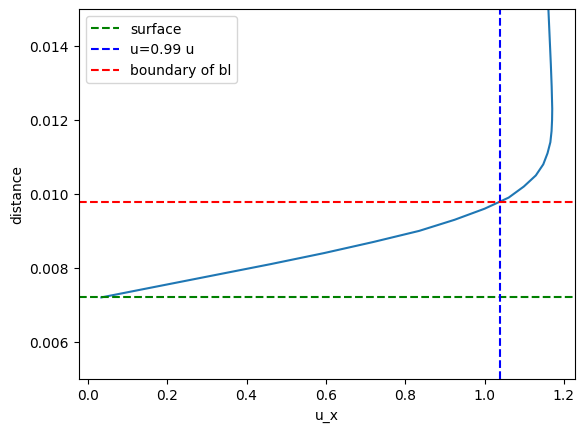

In [6]:
plt.plot(df['U:0'], df['Points:2'])
plt.ylim(0.005, 0.015)
plt.axhline(y=0.0072, color='g', linestyle='--', label='surface')
plt.axvline(x=0.99*u_inf, color='b', linestyle='--', label='u=0.99 u')
plt.axhline(y=0.00977, color='r', linestyle='--', label='boundary of bl')
plt.xlabel('u_x')
plt.ylabel('distance')
plt.legend()

So $\delta=0.00977-0.0072=0.00257$. The theoretical value of $\delta=0.12/\sqrt(4000)=0.0019$.

In [7]:
df = pd.read_csv('behind.csv')

In [8]:
df_slip = pd.read_csv('behind_slip.csv')
df_slip = df_slip.dropna()
df_slip = df_slip[df_slip['Points:2'] > 0]
u_inf = np.mean(df_slip['U:0'])

In [9]:
u_inf

1.02670658436214

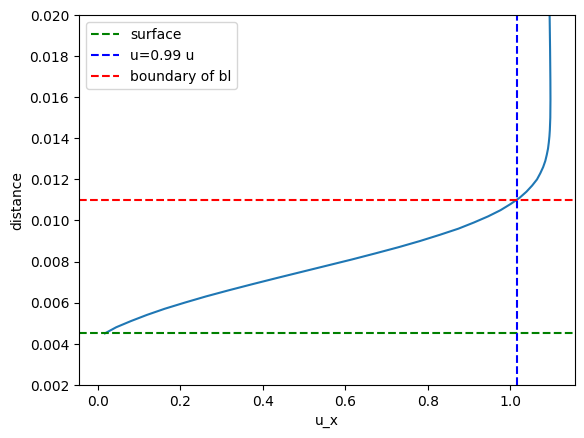

In [10]:
plt.plot(df['U:0'], df['Points:2'])
plt.ylim(0.002, 0.02)
plt.axhline(y=0.0045, color='g', linestyle='--', label='surface')
plt.axvline(x=0.99*u_inf, color='b', linestyle='--', label='u=0.99 u')
plt.axhline(y=0.011, color='r', linestyle='--', label='boundary of bl')
plt.xlabel('u_x')
plt.ylabel('distance')
plt.legend()


In this case $\delta= 0.011 - 0.0045 = 0.0065$.

In [11]:
df = pd.read_csv('first.csv')

In [12]:
df_slip = pd.read_csv('first_slip.csv')
df_slip = df_slip.dropna()
df_slip = df_slip[df_slip['Points:2'] > 0]
u_inf = np.mean(df_slip['U:0'])
u_inf

1.0452717021276596

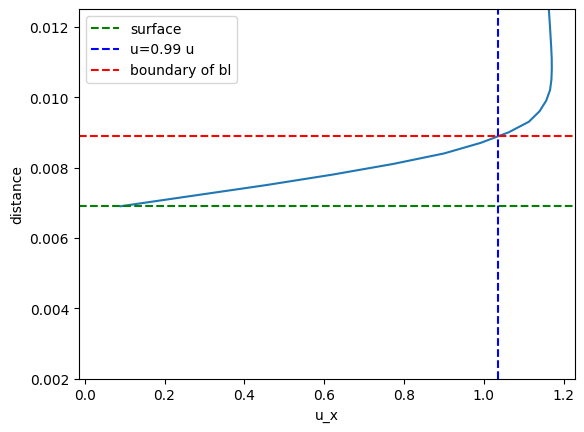

In [13]:
plt.plot(df['U:0'], df['Points:2'])
plt.ylim(0.002, 0.0125)
plt.axhline(y=0.0069, color='g', linestyle='--', label='surface')
plt.axvline(x=0.99*u_inf, color='b', linestyle='--', label='u=0.99 u')
plt.axhline(y=0.0089, color='r', linestyle='--', label='boundary of bl')
plt.xlabel('u_x')
plt.ylabel('distance')
plt.legend()

In this case $\delta= 0.0089 - 0.0069 = 0.0020$.

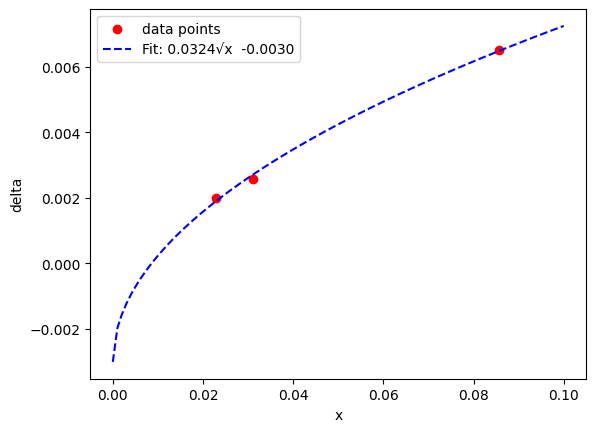

In [15]:
from scipy.optimize import curve_fit
x_vals= np.linspace(0, 0.1, 100)

x=[0.0229,0.031, 0.0856]
y=[0.0020,0.00257,0.0065]

def model(x, a, b):
    return a * np.sqrt(x) + b

params, _ = curve_fit(model, x, y)
a_fit, b_fit = params

y_fit = model(x_vals, a_fit, b_fit)

plt.scatter(x, y, color='red', label='data points')
plt.plot(x_vals, y_fit, color='blue', linestyle='--', label=f'Fit: {a_fit:.4f}√x  {b_fit:.4f}')
plt.xlabel('x')
plt.ylabel('delta')
plt.legend()
